# generate non-overlapped 1Mb-long window for CNV analysis

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# gen 1Mb bins

In [2]:
chromSizes = pd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/chromSizes/danRer11_2_main.chrom.sizes', 
                         sep = "\t", header = None, names = ['chr', 'length'])
chromSizes.index = chromSizes['chr']
chromSizes = chromSizes.drop('chr', axis = 1).to_dict()['length']
chromSizes

{'chr1': 59578282,
 'chr10': 45420867,
 'chr11': 45484837,
 'chr12': 49182954,
 'chr13': 52186027,
 'chr14': 52660232,
 'chr15': 48040578,
 'chr16': 55266484,
 'chr17': 53461100,
 'chr18': 51023478,
 'chr19': 48449771,
 'chr2': 59640629,
 'chr20': 55201332,
 'chr21': 45934066,
 'chr22': 39133080,
 'chr23': 46223584,
 'chr24': 42172926,
 'chr25': 37502051,
 'chr3': 62628489,
 'chr4': 74498832,
 'chr5': 72500376,
 'chr6': 60270059,
 'chr7': 74282399,
 'chr8': 54304671,
 'chr9': 56459846,
 'chrM': 16596}

In [5]:
bins_df = pd.DataFrame()
for chrom in list(chromSizes.keys()) :
    start = list(range(0, chromSizes[chrom], 1000000))
    end = list(range(1000000, chromSizes[chrom], 1000000)) + [chromSizes[chrom]]
    df = pd.DataFrame()
    df['start'] = start
    df['end'] = end
    df['chr'] = chrom
    bins_df = pd.concat([bins_df, df])
    
bins_df = bins_df.reset_index()
bins_df['bin_name'] = 'bin_' + bins_df['chr'] + '_' + bins_df['index'].astype(str)
bins_df = bins_df[['chr', 'start', 'end', 'bin_name']]
bins_df = bins_df.fillna(0)
bins_df['start'] = bins_df['start'].astype(int)
bins_df

,chr,start,end,bin_name
0,chr1,0,1000000,bin_chr1_0
1,chr1,1000000,2000000,bin_chr1_1
2,chr1,2000000,3000000,bin_chr1_2
3,chr1,3000000,4000000,bin_chr1_3
4,chr1,4000000,5000000,bin_chr1_4
...,...,...,...,...
1353,chr9,53000000,54000000,bin_chr9_53
1354,chr9,54000000,55000000,bin_chr9_54
1355,chr9,55000000,56000000,bin_chr9_55
1356,chr9,56000000,56459846,bin_chr9_56


In [6]:
bins_df.to_csv(
    '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/genome_bin/danRer11_2_main.1MbBin.bed', 
    header = False, index = False, sep = "\t")


# window coverage

In [7]:
%%bash
cd ~/maternal_loading/1.private_data/20221209_WGS/analysis
bin_1Mb=/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/genome_bin/danRer11_2_main.1MbBin.bed
for bdg in $(ls ../2_signal/Np*.bedGraph);do
    name1=$(basename $bdg)
    name=${name1%%.bedGraph}
    echo $name1
    bedtools intersect -b $bdg -a $bin_1Mb -wa -wb -sorted > ${name}.intersect_1MbBin.bed
done

Npm2a-1k-2N_20221209.bedGraph
Npm2a-1k-2N_20221216.bedGraph
Npm2a-1k-4N_20221209.bedGraph
Npm2a-1k-4N_20221216.bedGraph
Npm2a-256-2N_20221209.bedGraph
Npm2a-256-2N_20221216.bedGraph
Npm2a-256-4N_20221209.bedGraph
Npm2a-256-4N_20221216.bedGraph
Npm2a-4-5h-1-2N_20221216.bedGraph
Npm2a-4-5h-1-4N_20221216.bedGraph
Npm2a-4-5h-2-2N_20221216.bedGraph
Npm2a-4-5h-2-4N_20221216.bedGraph
Npm2a-4-5h-2N_20221209.bedGraph
Npm2a-4-5h-4N_20221209.bedGraph
Npm2a-5-5h-1-2N_20221209.bedGraph
Npm2a-5-5h-1-4N_20221209.bedGraph
Npm2a-5-5h-2-2N_20221209.bedGraph
Npm2a-5-5h-2-4N_20221209.bedGraph
YueLab_Input_embryonic_Brain_rep1.bedGraph
YueLab_Input_embryonic_Brain_rep2.bedGraph
YueLab_Input_embryonic_Trunk_rep1.bedGraph
YueLab_Input_embryonic_Trunk_rep2.bedGraph


In [14]:
%%bash
cd ~/maternal_loading/1.private_data/20221209_WGS/analysis
for fi in $(ls *.intersect_1MbBin.bed);do
    name1=$(basename $fi)
    name=${name1%%.intersect_1MbBin.bed}
    echo $name
    awk 'BEGIN{FS=OFS="\t"}{print $1,$2+2,$3-2,$4,$8*($7-$6)}' $fi > ${fi}.tmp
    bedtools merge -i ${fi}.tmp -c 4,5 -o distinct,sum > ${name}.intersect_1MbBin.covMerge.bed
done

Npm2a-1k-2N_20221209
Npm2a-1k-2N_20221216
Npm2a-1k-4N_20221209
Npm2a-1k-4N_20221216
Npm2a-256-2N_20221209
Npm2a-256-2N_20221216
Npm2a-256-4N_20221209
Npm2a-256-4N_20221216
Npm2a-4-5h-1-2N_20221216
Npm2a-4-5h-1-4N_20221216
Npm2a-4-5h-2-2N_20221216
Npm2a-4-5h-2-4N_20221216
Npm2a-4-5h-2N_20221209
Npm2a-4-5h-4N_20221209
Npm2a-5-5h-1-2N_20221209
Npm2a-5-5h-1-4N_20221209
Npm2a-5-5h-2-2N_20221209
Npm2a-5-5h-2-4N_20221209


In [15]:
name_list_2reps = [
    ['Npm2a-1k-2N_20221209', '1k-cell, 2N, rep1'],
    ['Npm2a-1k-2N_20221216', '1k-cell, 2N, rep2'],
    ['Npm2a-1k-4N_20221209', '1k-cell, 4N, rep1'],
    ['Npm2a-1k-4N_20221216', '1k-cell, 4N, rep2'],
    ['Npm2a-256-2N_20221209', '256-cell, 2N, rep1'],
    ['Npm2a-256-2N_20221216', '256-cell, 2N, rep2'],
    ['Npm2a-256-4N_20221209', '256-cell, 4N, rep1'],
    ['Npm2a-256-4N_20221216', '256-cell, 4N, rep2'],
    ['Npm2a-4-5h-1-2N_20221216', '4.5 hpf, 2N, rep1'],
    ['Npm2a-4-5h-1-4N_20221216', '4.5 hpf, 4N, rep1'],
    ['Npm2a-4-5h-2-2N_20221216', '4.5 hpf, 2N, rep2'],
    ['Npm2a-4-5h-2-4N_20221216', '4.5 hpf, 4N, rep2'],
    ['Npm2a-5-5h-1-2N_20221209', '5.5 hpf, 2N, rep1'],
    ['Npm2a-5-5h-1-4N_20221209', '5.5 hpf, 4N, rep1'],
    ['Npm2a-5-5h-2-2N_20221209', '5.5 hpf, 2N, rep2'],
    ['Npm2a-5-5h-2-4N_20221209', '5.5 hpf, 4N, rep2'],
]

In [23]:
df

,chr,start,end,bin_num,cov_sum,len,len_ratio,"5.5 hpf, 4N, rep2"
0,chr1,2,999998,bin_chr1_0,18469117,1000000,0.000745,13767.270098
1,chr1,1000002,1999998,bin_chr1_1,3697839,1000000,0.000745,2756.447333
2,chr1,2000002,2999998,bin_chr1_2,2550415,1000000,0.000745,1901.133236
3,chr1,3000002,3999998,bin_chr1_3,2907827,1000000,0.000745,2167.555693
4,chr1,4000002,4999998,bin_chr1_4,1806311,1000000,0.000745,1346.462390
...,...,...,...,...,...,...,...,...
1353,chr9,53000002,53999998,bin_chr9_53,851520,1000000,0.000745,634.741002
1354,chr9,54000002,54999998,bin_chr9_54,1992596,1000000,0.000745,1485.323166
1355,chr9,55000002,55999998,bin_chr9_55,2106681,1000000,0.000745,1570.364535
1356,chr9,56000002,56459844,bin_chr9_56,6887377,459846,0.000343,2360.847689


In [66]:
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis')
from glob import glob

cov_df = pd.DataFrame()
for i, names in enumerate(name_list_2reps) :
    df = pd.read_csv(f'{names[0]}.intersect_1MbBin.covMerge.bed', sep = "\t", header = None, names = ['chr', 'start', 'end', 'bin_num', 'cov_sum'])
    df['len'] = df['end'] - df['start'] + 4
    df['len_ratio'] = [x / sum(df['len']) for x in df['len']]
    df[names[1]] = df['cov_sum'] / (df['len_ratio'] * sum(df['cov_sum']))
    if i == 0 :
        cov_df = df[['bin_num', names[1]]]
    else :
        cov_df = pd.merge(cov_df, df[['bin_num', names[1]]], on = 'bin_num') 
    
cov_df    

,bin_num,"1k-cell, 2N, rep1","1k-cell, 2N, rep2","1k-cell, 4N, rep1","1k-cell, 4N, rep2","256-cell, 2N, rep1","256-cell, 2N, rep2","256-cell, 4N, rep1","256-cell, 4N, rep2","4.5 hpf, 2N, rep1","4.5 hpf, 4N, rep1","4.5 hpf, 2N, rep2","4.5 hpf, 4N, rep2","5.5 hpf, 2N, rep1","5.5 hpf, 4N, rep1","5.5 hpf, 2N, rep2","5.5 hpf, 4N, rep2"
0,bin_chr1_0,2.646509,0.271175,1.023282,1.167425,1.339510,1.353662,3.497979,1.219211,4.434766,1.182528,0.404073,0.704548,5.885559,0.386540,2.795251,7.500057
1,bin_chr1_1,1.122350,1.140339,0.602807,0.857819,0.119013,2.109825,1.113346,0.813597,3.101814,0.670190,0.279029,0.722123,1.028547,0.098956,1.551118,1.501642
2,bin_chr1_2,1.017501,0.240402,0.498502,0.850988,0.068653,0.315916,0.638623,0.714982,2.337129,0.681630,0.270912,0.657610,1.401815,0.084161,0.952429,1.035689
3,bin_chr1_3,1.104298,0.642716,0.554632,0.976478,0.434395,0.732843,0.844252,0.799287,0.906824,0.853163,0.449871,0.836478,0.860242,0.538722,0.964977,1.180829
4,bin_chr1_4,0.846908,3.501885,0.502249,0.949322,0.270592,1.447059,0.558973,0.777084,0.451107,0.634030,0.413284,0.802172,0.538971,0.085639,0.680092,0.733518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,bin_chr9_53,0.512223,1.395110,0.847314,0.655666,0.228560,0.225314,0.435448,0.766268,0.434327,0.637770,1.258820,0.629658,0.578008,0.164899,0.417692,0.345791
1354,bin_chr9_54,0.803138,0.161787,1.152016,0.913482,0.461760,0.224324,0.937047,0.913082,0.517473,0.944382,0.653266,0.826642,0.644103,0.177784,0.982878,0.809166
1355,bin_chr9_55,0.754398,2.435048,1.151046,0.830824,0.222387,0.136000,0.831857,0.883769,0.485639,0.765618,1.117925,0.656803,1.116264,0.276936,0.642039,0.855495
1356,bin_chr9_56,1.662321,0.220940,1.846266,0.778246,0.958924,0.447540,2.655807,1.164757,0.778799,1.289225,0.593354,0.621425,2.983020,0.850530,2.504041,6.082189


In [68]:
cov_df_log2 = np.log2(cov_df.set_index('bin_num').iloc[:-1, :])
cov_df_log2

,"1k-cell, 2N, rep1","1k-cell, 2N, rep2","1k-cell, 4N, rep1","1k-cell, 4N, rep2","256-cell, 2N, rep1","256-cell, 2N, rep2","256-cell, 4N, rep1","256-cell, 4N, rep2","4.5 hpf, 2N, rep1","4.5 hpf, 4N, rep1","4.5 hpf, 2N, rep2","4.5 hpf, 4N, rep2","5.5 hpf, 2N, rep1","5.5 hpf, 4N, rep1","5.5 hpf, 2N, rep2","5.5 hpf, 4N, rep2"
bin_num,,,,,,,,,,,,,,,,
bin_chr1_0,1.404091,-1.882704,0.033204,0.223329,0.421705,0.436868,1.806522,0.285948,2.148858,0.241874,-1.307312,-0.505231,2.557179,-1.371310,1.482978,2.906902
bin_chr1_1,0.166523,0.189463,-0.730232,-0.221255,-3.070814,1.077123,0.154902,-0.297613,1.633112,-0.577359,-1.841512,-0.469684,0.040608,-3.337072,0.633308,0.586541
bin_chr1_2,0.025030,-2.056479,-1.004329,-0.232789,-3.864543,-1.662387,-0.646964,-0.484022,1.224737,-0.552938,-1.884102,-0.604697,0.487296,-3.570705,-0.070317,0.050591
bin_chr1_3,0.143129,-0.637748,-0.850398,-0.034340,-1.202919,-0.448425,-0.244255,-0.323215,-0.141106,-0.229107,-1.152416,-0.257600,-0.217185,-0.892387,-0.051434,0.239800
bin_chr1_4,-0.239722,1.808132,-0.993525,-0.075031,-1.885809,0.533124,-0.839150,-0.363858,-1.148458,-0.657376,-1.274794,-0.318016,-0.891720,-3.545585,-0.556197,-0.447095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bin_chr9_52,-0.818432,-0.911817,-0.132983,-0.363886,-2.819461,-1.297581,-1.441273,-0.311602,-1.300140,-0.127188,-1.016481,-0.305121,-0.790661,-3.234125,-0.772153,-0.490841
bin_chr9_53,-0.965155,0.480379,-0.239031,-0.608966,-2.129354,-2.149994,-1.199428,-0.384080,-1.203146,-0.648892,0.332072,-0.667361,-0.790839,-2.600350,-1.259488,-1.532029
bin_chr9_54,-0.316280,-2.627833,0.204161,-0.130551,-1.114784,-2.156342,-0.093807,-0.131184,-0.950446,-0.082558,-0.614258,-0.274666,-0.634636,-2.491800,-0.024916,-0.305492


In [69]:
corr_cov = cov_df_log2.corr()

/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


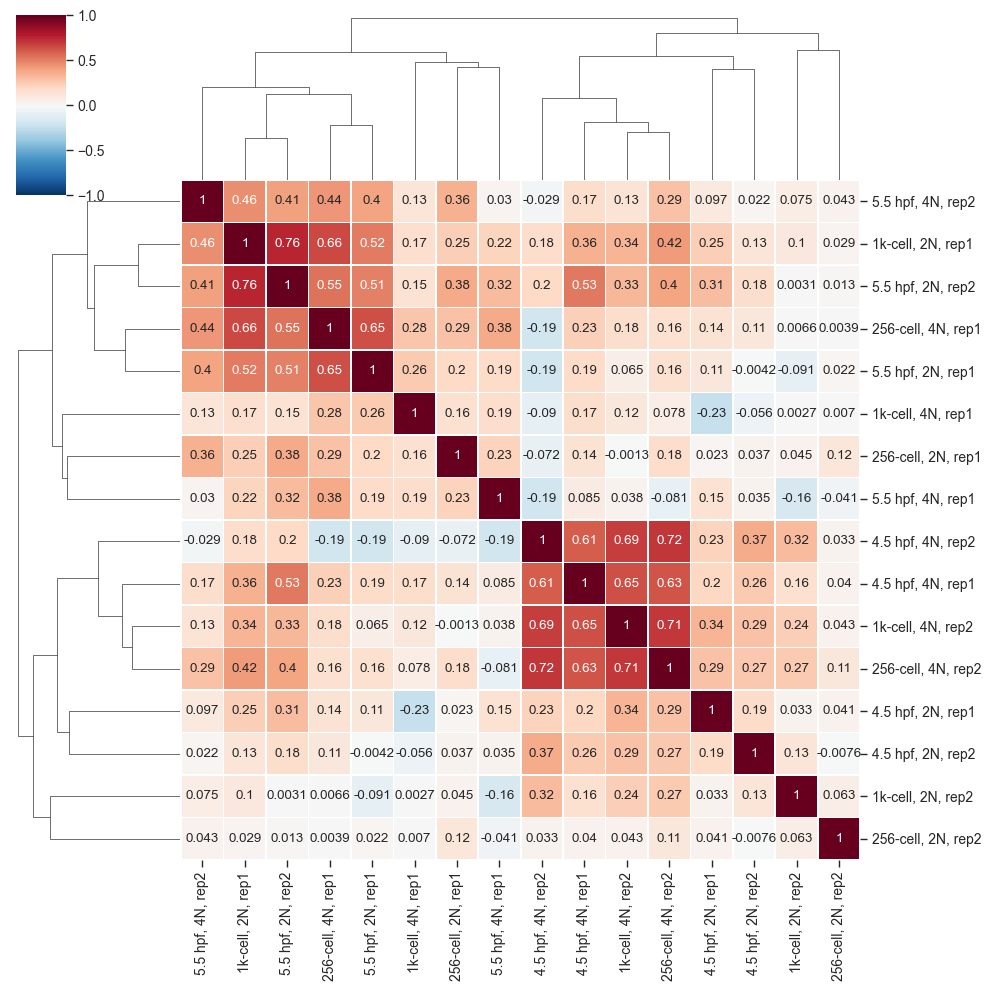

In [70]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    

    colors = ['#FFFFFF', '#FF0000', ]
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list("mycmap", colors)

    # Draw the heatmap with the mask and correct aspect ratio\
    g = sns.clustermap(corr_cov,
                #mask=mask,
                cmap='RdBu_r',
                vmin=-1,
                vmax=1,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .5},
                annot=True,
                )
    g.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make7_heatmap_corr_covWeightedByLen.pdf',
              transparent=True)
    
    

# diff O/E between bins

In [71]:
cov_df_log2

,"1k-cell, 2N, rep1","1k-cell, 2N, rep2","1k-cell, 4N, rep1","1k-cell, 4N, rep2","256-cell, 2N, rep1","256-cell, 2N, rep2","256-cell, 4N, rep1","256-cell, 4N, rep2","4.5 hpf, 2N, rep1","4.5 hpf, 4N, rep1","4.5 hpf, 2N, rep2","4.5 hpf, 4N, rep2","5.5 hpf, 2N, rep1","5.5 hpf, 4N, rep1","5.5 hpf, 2N, rep2","5.5 hpf, 4N, rep2"
bin_num,,,,,,,,,,,,,,,,
bin_chr1_0,1.404091,-1.882704,0.033204,0.223329,0.421705,0.436868,1.806522,0.285948,2.148858,0.241874,-1.307312,-0.505231,2.557179,-1.371310,1.482978,2.906902
bin_chr1_1,0.166523,0.189463,-0.730232,-0.221255,-3.070814,1.077123,0.154902,-0.297613,1.633112,-0.577359,-1.841512,-0.469684,0.040608,-3.337072,0.633308,0.586541
bin_chr1_2,0.025030,-2.056479,-1.004329,-0.232789,-3.864543,-1.662387,-0.646964,-0.484022,1.224737,-0.552938,-1.884102,-0.604697,0.487296,-3.570705,-0.070317,0.050591
bin_chr1_3,0.143129,-0.637748,-0.850398,-0.034340,-1.202919,-0.448425,-0.244255,-0.323215,-0.141106,-0.229107,-1.152416,-0.257600,-0.217185,-0.892387,-0.051434,0.239800
bin_chr1_4,-0.239722,1.808132,-0.993525,-0.075031,-1.885809,0.533124,-0.839150,-0.363858,-1.148458,-0.657376,-1.274794,-0.318016,-0.891720,-3.545585,-0.556197,-0.447095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bin_chr9_52,-0.818432,-0.911817,-0.132983,-0.363886,-2.819461,-1.297581,-1.441273,-0.311602,-1.300140,-0.127188,-1.016481,-0.305121,-0.790661,-3.234125,-0.772153,-0.490841
bin_chr9_53,-0.965155,0.480379,-0.239031,-0.608966,-2.129354,-2.149994,-1.199428,-0.384080,-1.203146,-0.648892,0.332072,-0.667361,-0.790839,-2.600350,-1.259488,-1.532029
bin_chr9_54,-0.316280,-2.627833,0.204161,-0.130551,-1.114784,-2.156342,-0.093807,-0.131184,-0.950446,-0.082558,-0.614258,-0.274666,-0.634636,-2.491800,-0.024916,-0.305492


In [37]:
1.122350 - 2.646509

-1.524159

In [81]:
cov_df_log2

,"1k-cell, 2N, rep1","1k-cell, 2N, rep2","1k-cell, 4N, rep1","1k-cell, 4N, rep2","256-cell, 2N, rep1","256-cell, 2N, rep2","256-cell, 4N, rep1","256-cell, 4N, rep2","4.5 hpf, 2N, rep1","4.5 hpf, 4N, rep1","4.5 hpf, 2N, rep2","4.5 hpf, 4N, rep2","5.5 hpf, 2N, rep1","5.5 hpf, 4N, rep1","5.5 hpf, 2N, rep2","5.5 hpf, 4N, rep2",chr
bin_num,,,,,,,,,,,,,,,,,
bin_chr1_0,1.404091,-1.882704,0.033204,0.223329,0.421705,0.436868,1.806522,0.285948,2.148858,0.241874,-1.307312,-0.505231,2.557179,-1.371310,1.482978,2.906902,chr1
bin_chr1_1,0.166523,0.189463,-0.730232,-0.221255,-3.070814,1.077123,0.154902,-0.297613,1.633112,-0.577359,-1.841512,-0.469684,0.040608,-3.337072,0.633308,0.586541,chr1
bin_chr1_2,0.025030,-2.056479,-1.004329,-0.232789,-3.864543,-1.662387,-0.646964,-0.484022,1.224737,-0.552938,-1.884102,-0.604697,0.487296,-3.570705,-0.070317,0.050591,chr1
bin_chr1_3,0.143129,-0.637748,-0.850398,-0.034340,-1.202919,-0.448425,-0.244255,-0.323215,-0.141106,-0.229107,-1.152416,-0.257600,-0.217185,-0.892387,-0.051434,0.239800,chr1
bin_chr1_4,-0.239722,1.808132,-0.993525,-0.075031,-1.885809,0.533124,-0.839150,-0.363858,-1.148458,-0.657376,-1.274794,-0.318016,-0.891720,-3.545585,-0.556197,-0.447095,chr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bin_chr9_52,-0.818432,-0.911817,-0.132983,-0.363886,-2.819461,-1.297581,-1.441273,-0.311602,-1.300140,-0.127188,-1.016481,-0.305121,-0.790661,-3.234125,-0.772153,-0.490841,chr9
bin_chr9_53,-0.965155,0.480379,-0.239031,-0.608966,-2.129354,-2.149994,-1.199428,-0.384080,-1.203146,-0.648892,0.332072,-0.667361,-0.790839,-2.600350,-1.259488,-1.532029,chr9
bin_chr9_54,-0.316280,-2.627833,0.204161,-0.130551,-1.114784,-2.156342,-0.093807,-0.131184,-0.950446,-0.082558,-0.614258,-0.274666,-0.634636,-2.491800,-0.024916,-0.305492,chr9


In [96]:
def diff_between_neighbor_bin(cov_df_col) :
    x1 = cov_df_col[:-1].tolist()
    x2 = cov_df_col[1:].tolist()
    diff_ls = []
    for a,b in zip(x1,x2) :
        diff = b - a
        diff_ls.append(diff)
    return (diff_ls)

diff_neighborBin_cov_df = pd.DataFrame()
cov_df_log2['chr'] = cov_df_log2.reset_index()['bin_num'].str.split('_').str[1].tolist()
for chr in cov_df_log2['chr'].unique() :
    if chr != 'chrM' :
        df = cov_df_log2[cov_df_log2['chr'] == chr].iloc[:,:-1].apply(diff_between_neighbor_bin, axis = 0)
        diff_neighborBin_cov_df = pd.concat([diff_neighborBin_cov_df, df], axis = 0).reset_index(drop = True)
        
diff_neighborBin_cov_df


,"1k-cell, 2N, rep1","1k-cell, 2N, rep2","1k-cell, 4N, rep1","1k-cell, 4N, rep2","256-cell, 2N, rep1","256-cell, 2N, rep2","256-cell, 4N, rep1","256-cell, 4N, rep2","4.5 hpf, 2N, rep1","4.5 hpf, 4N, rep1","4.5 hpf, 2N, rep2","4.5 hpf, 4N, rep2","5.5 hpf, 2N, rep1","5.5 hpf, 4N, rep1","5.5 hpf, 2N, rep2","5.5 hpf, 4N, rep2"
0,-1.237568,2.072167,-0.763436,-0.444584,-3.492519,0.640255,-1.651620,-0.583561,-0.515746,-0.819233,-0.534200,0.035546,-2.516571,-1.965762,-0.849670,-2.320361
1,-0.141493,-2.245943,-0.274097,-0.011534,-0.793729,-2.739510,-0.801866,-0.186409,-0.408375,0.024420,-0.042590,-0.135012,0.446688,-0.233633,-0.703625,-0.535950
2,0.118100,1.418732,0.153932,0.198449,2.661624,1.213962,0.402709,0.160807,-1.365843,0.323831,0.731686,0.347096,-0.704481,2.678318,0.018883,0.189209
3,-0.382852,2.445879,-0.143127,-0.040691,-0.682890,0.981549,-0.594895,-0.040644,-1.007352,-0.428269,-0.122378,-0.060415,-0.674536,-2.653198,-0.504763,-0.686895
4,-0.020359,-0.846256,-0.077436,0.034078,-1.074108,-0.510609,-0.262767,0.140611,1.761651,0.235132,0.085029,0.161262,-0.910655,-0.055062,-0.466941,0.315624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,-0.016735,1.634328,-0.173196,-0.034747,-0.978021,0.878059,-0.478888,0.068339,-0.094032,0.345682,-1.916220,0.151856,-0.130617,-0.623206,0.124970,0.037269
1328,-0.146723,1.392196,-0.106047,-0.245080,0.690107,-0.852413,0.241845,-0.072477,0.096994,-0.521704,1.348553,-0.362240,-0.000177,0.633775,-0.487336,-1.041189
1329,0.648875,-3.108212,0.443192,0.478415,1.014570,-0.006348,1.105621,0.252896,0.252700,0.566334,-0.946330,0.392695,0.156203,0.108549,1.234572,1.226537
1330,-0.090322,3.911783,-0.001216,-0.136834,-1.054069,-0.721983,-0.171787,-0.047074,-0.091598,-0.302745,0.775081,-0.331801,0.793314,0.639426,-0.614351,0.080323


In [82]:
stage_order = {
    '256-cell' : 0,
    '1k-cell' : 1,
    '4.5 hpf' : 2,
    '5.5 hpf' : 3
}

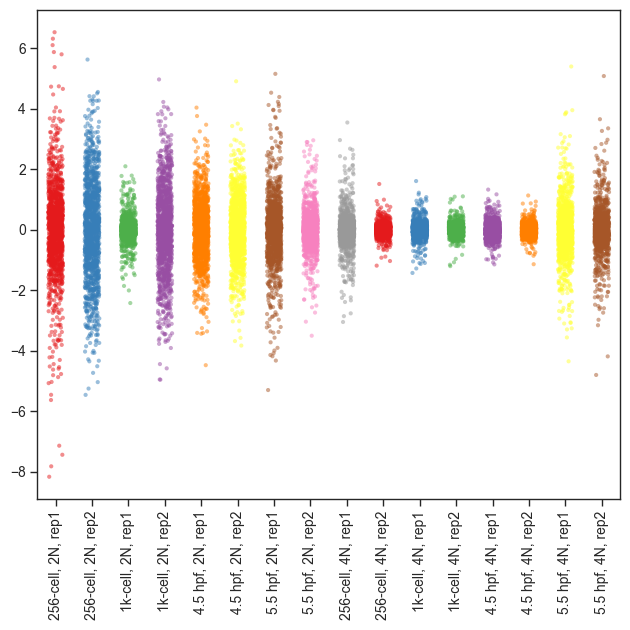

In [97]:
### stripplot not used
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    plot_df_diff = diff_neighborBin_cov_df.copy().T
    plot_df_diff['names'] = plot_df_diff.index
    plot_df_diff['4N / 2N'] = plot_df_diff['names'].str.split(', ', expand = True)[1]
    plot_df_diff['stage'] = plot_df_diff['names'].str.split(', ', expand = True)[0]
    plot_df_diff['stage-nuclear'] = plot_df_diff['stage'] + ' ' + plot_df_diff['4N / 2N']
    plot_df_diff['stage_order'] = [stage_order[x] for x in plot_df_diff['stage']]
    plot_df_diff = plot_df_diff.sort_values(['4N / 2N', 'stage_order'])

    fig, ax = plt.subplots(figsize=(6.4, 6.4), tight_layout=True)
    sns.stripplot(
        data = plot_df_diff.iloc[:, :-5].T, 
        jitter = 0.2, 
        size = 3, 
        alpha = 0.5,
        ax = ax,
        palette = 'Set1',
        )
    # ax.set_yscale('log')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make7_stripplot_diffNeighborBin_OvsE.pdf', transparent=True)

In [144]:
def stack_percentage_bar(results, horizontal=False, annotate='number'):
    import sys
    """\
    results : pandas.DataFrame
        results.index is the name of each sample.
        results.columns is the label of each category
    horizontal: bool
        If the figure should be horizontal.
    """
    # the following modules should been loaded before
    #import numpy as np
    #import matplotlib as mpl
    #mpl.rcParams['pdf.fonttype'] = 42
    #mpl.rcParams['ps.fonttype'] = 42
    #mpl.rcParams['font.sans-serif'] = 'Helvetica'
    #import matplotlib.pyplot as plt
    #import seaborn as sns
    percentage = results.div(results.sum(axis=1), axis=0) * 100
    percentage_cum = percentage.cumsum(axis=1)
    percentage_cum.loc[:, percentage_cum.shape[1] - 1] = 100.0
    category_colors = plt.get_cmap('Blues_r')(np.linspace(
        0.15, 0.85, results.shape[1]))
    if horizontal:
        fig, ax = plt.subplots(figsize=(6.4 * 1.25, 4.8))
        ax.invert_yaxis()
        ax.set_xlim(0, 100)
        for i, (category_name,
                color) in enumerate(zip(results.columns, category_colors)):
            widths = percentage.iloc[:, i]
            starts = percentage_cum.iloc[:, i] - widths
            ax.barh(results.index,
                    widths,
                    left=starts,
                    height=0.5,
                    label=category_name,
                    color=color)
            xcenters = starts + widths / 2
            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.33 else (
                'grey' if r * g * b < 0.66 else 'black')
            if annotate == 'number':
                text = [f'{x:d}' for x in results.iloc[:, i]]
            elif annotate == 'percentage':
                text = [f'{x/100:.2%}' for x in percentage.iloc[:, i]]
            else:
                sys.stdout.write(
                    f'Invalide annotate input: {annotate}. Use default parameters number.'
                )
                text = [f'{x:d}' for x in results.iloc[:, i]]
            for y, (x, c) in enumerate(zip(xcenters, text)):
                ax.text(x, y, c, ha='center', va='center', color=text_color)
        ax.set_xticks(np.arange(0, 120, 20))
        ax.set_xticklabels(np.arange(0, 120, 20))
        ax.set_xlabel('Percentage')
        ax.set_yticks(np.arange(percentage.shape[0]))
        ax.set_yticklabels(percentage.index)
        ax.set_ylabel('Sample')
        ax.legend(ncol=results.shape[1],
                  bbox_to_anchor=(0, 1),
                  loc='lower left',
                  fontsize='small')
    else:
        fig, ax = plt.subplots(figsize=(6.4 * .75, 4.8 * .75))
        ax.set_ylim(0, 100)
        for i, (category_name,
                color) in enumerate(zip(results.columns, category_colors)):
            hights = percentage.iloc[:, i]
            starts = percentage_cum.iloc[:, i] - hights
            ax.bar(results.index,
                   hights,
                   bottom=starts,
                   width=0.5,
                   label=category_name,
                   color=color)
            xcenters = starts + hights / 2
            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.33 else (
                'grey' if r * g * b < 0.66 else 'black')
            if annotate == 'number':
                text = [f'{x:d}' for x in results.iloc[:, i]]
            elif annotate == 'percentage':
                text = [f'{x/100:.2%}' for x in percentage.iloc[:, i]]
            else:
                sys.stdout.write(
                    f'Invalide annotate input: {annotate}. Use default parameters number.'
                )
                text = [f'{x:d}' for x in results.iloc[:, i]]
            for x, (c, y) in enumerate(zip(text, xcenters)):
                ax.text(x, y, c, ha='center', va='center', color=text_color)
        ax.set_xticks(np.arange(results.shape[0]))
        ax.set_xticklabels(percentage.index, ) #rotation=45, ha='right'
#         ax.set_xlabel('Sample')
        ax.set_yticks(np.arange(0, 120, 20))
        ax.set_yticklabels(np.arange(0, 120, 20))
        ax.set_ylabel('Percentage')
        ax.legend(bbox_to_anchor=(1, 0), loc='lower left')
    return fig, ax

In [105]:
diff_neighborBin_cov_df.abs().max()

1k-cell, 2N, rep1     2.421291
1k-cell, 2N, rep2     4.963316
1k-cell, 4N, rep1     1.607274
1k-cell, 4N, rep2     1.201952
256-cell, 2N, rep1    8.158124
256-cell, 2N, rep2    5.620099
256-cell, 4N, rep1    3.540649
256-cell, 4N, rep2    1.510690
4.5 hpf, 2N, rep1     4.473619
4.5 hpf, 4N, rep1     1.325361
4.5 hpf, 2N, rep2     4.902530
4.5 hpf, 4N, rep2     1.139195
5.5 hpf, 2N, rep1     5.295035
5.5 hpf, 4N, rep1     5.390691
5.5 hpf, 2N, rep2     3.500555
5.5 hpf, 4N, rep2     5.075302
dtype: float64

In [146]:
diff_neighborBin_cov_df_abs = diff_neighborBin_cov_df.abs()
diff_range_dict = {}
range_ls = [0, 0.5, 1, 10]
for i in range(len(range_ls) - 1):
    count = diff_neighborBin_cov_df_abs.where((diff_neighborBin_cov_df_abs > range_ls[i]) & (diff_neighborBin_cov_df_abs < range_ls[i + 1]), False).mask((diff_neighborBin_cov_df_abs > range_ls[i]) & (diff_neighborBin_cov_df_abs < range_ls[i + 1]), True).sum(axis=0)
    diff_range_dict[f'{range_ls[i]}~{range_ls[i+1]}'] = count
    
diff_range_df = pd.DataFrame.from_dict(diff_range_dict)
diff_range_df['stage'] = diff_range_df.reset_index()['index'].str.split(', ').str[0].tolist()
diff_range_df['4N / 2N'] = diff_range_df.reset_index()['index'].str.split(', ').str[1].tolist()
diff_range_df['stage_order'] = [stage_order[x] for x in diff_range_df['stage']]
diff_range_df = diff_range_df.sort_values(by=['stage_order', '4N / 2N'][::-1])
diff_range_df.columns = ['0 ~ 0.5', '0.5 ~ 1', '> 1', 'stage', '4N / 2N', 'stage_order']
diff_range_df

,0 ~ 0.5,0.5 ~ 1,> 1,stage,4N / 2N,stage_order
"256-cell, 2N, rep1",441,371,520,256-cell,2N,0
"256-cell, 2N, rep2",343,287,702,256-cell,2N,0
"1k-cell, 2N, rep1",1180,101,51,1k-cell,2N,1
"1k-cell, 2N, rep2",424,323,585,1k-cell,2N,1
"4.5 hpf, 2N, rep1",550,393,389,4.5 hpf,2N,2
"4.5 hpf, 2N, rep2",523,394,415,4.5 hpf,2N,2
"5.5 hpf, 2N, rep1",663,345,324,5.5 hpf,2N,3
"5.5 hpf, 2N, rep2",959,246,127,5.5 hpf,2N,3
"256-cell, 4N, rep1",1087,143,102,256-cell,4N,0
"256-cell, 4N, rep2",1298,31,3,256-cell,4N,0


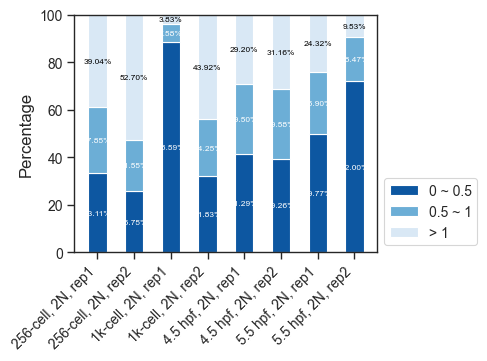

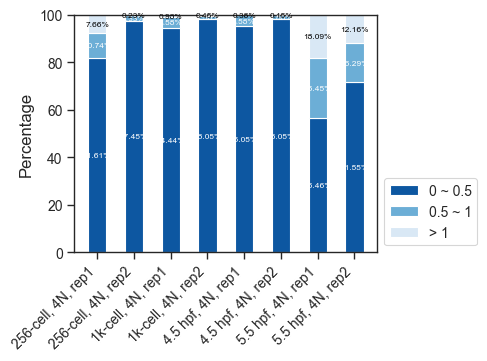

In [147]:
### stack barplot
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10,
                             'font.size': 6,
                         }):
    for N in ['2N', '4N'] :
        plot_df_diff_range = diff_range_df[diff_range_df['4N / 2N'] == N]
        fig, ax = stack_percentage_bar(plot_df_diff_range.iloc[:, :-3],
                                    horizontal=False,
                                    annotate='percentage',
                                    )
        # ax.set_xlabel('Peaks\n(q_value > 10, fold > 10)')
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        fig.tight_layout()
        fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make7_stackBar_1MbBin_diffNeighborLog2OvsE_{N}.pdf',
                    transparent=True)